# Objetivo

O objetivo deste notebook é explorar o Algoritmo k-means por intermédio da Library Scikit-Learn.

## O que é k-means

Trata-se de uma técnica de aprendizado não-supervisionado. K-means é um dos algoritmos mais simples e mais utilizados para partição de observações multidimensionais em $k$ clusters ($k$ deve ser pré-determinado), de modo que a maximizar a similaridade das observações pertencentes a um mesmo cluster e a minimizar a similaridade de observações pertencentes a clusters distintos com base em uma medida de distância.


**Pontos de Atenção:**
- Funciona bem para clusters em formato esférico, em bases de dados de tamanho médio.
- Nem sempre converge para o ótimo global
- O resultado depende em parte da seleção inicial dos centros dos cluster (médias dos pontos pertencentes ao cluster). Para obter resultados melhores, recomenda-se iniciar o algoritmo várias vezes, em diferentes pontos, para verificar a performance ou aplicar técnicas para otimizar a inicialização do algoritmo (ex: k-means++)
- Não funciona bem para dados nominais transformados em numéricos
- É muito sensível a outliers 
- É importante normalizar os dados antes de aplicar k-means

## Algoritmo

> 1. Selecionar aleatoriamente $k$ centroides (centro do cluster)
> 2. Repita:
>       
>       2.1. Associe cada observação ao centroide mais próximo (é comum usar distância euclidiana)
>
>       2.2. Calcule o novo centroide (média dos pontos pertencentes ao cluster)
> 3. Pare quando a posição do centroide não muda mais



# Importando Librarys

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Lendo os dados

In [2]:
# Carrega dataset Iris
from sklearn import datasets
iris = datasets.load_iris()


In [3]:
# Transforma em dataframe
df=pd.DataFrame(iris['data'],columns=['x1','x2','x3','x4'])
df.head()

,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Calcula estatísticas descritivas
df.describe()

,x1,x2,x3,x4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


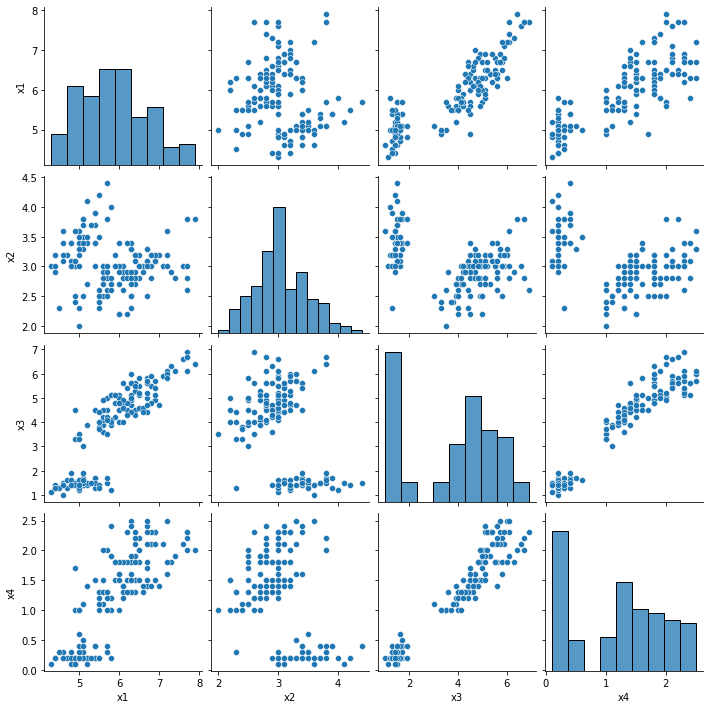

In [5]:
# Plot das variáveis 2 a 2
sns.pairplot(df);

# Normalização dos dados

In [6]:
scaler = StandardScaler() #normaliza os dados retirando a média e dividindo pelo desvio padrão
X = scaler.fit_transform(df) #Retorna um array com os dados transformados
X[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

# K-means

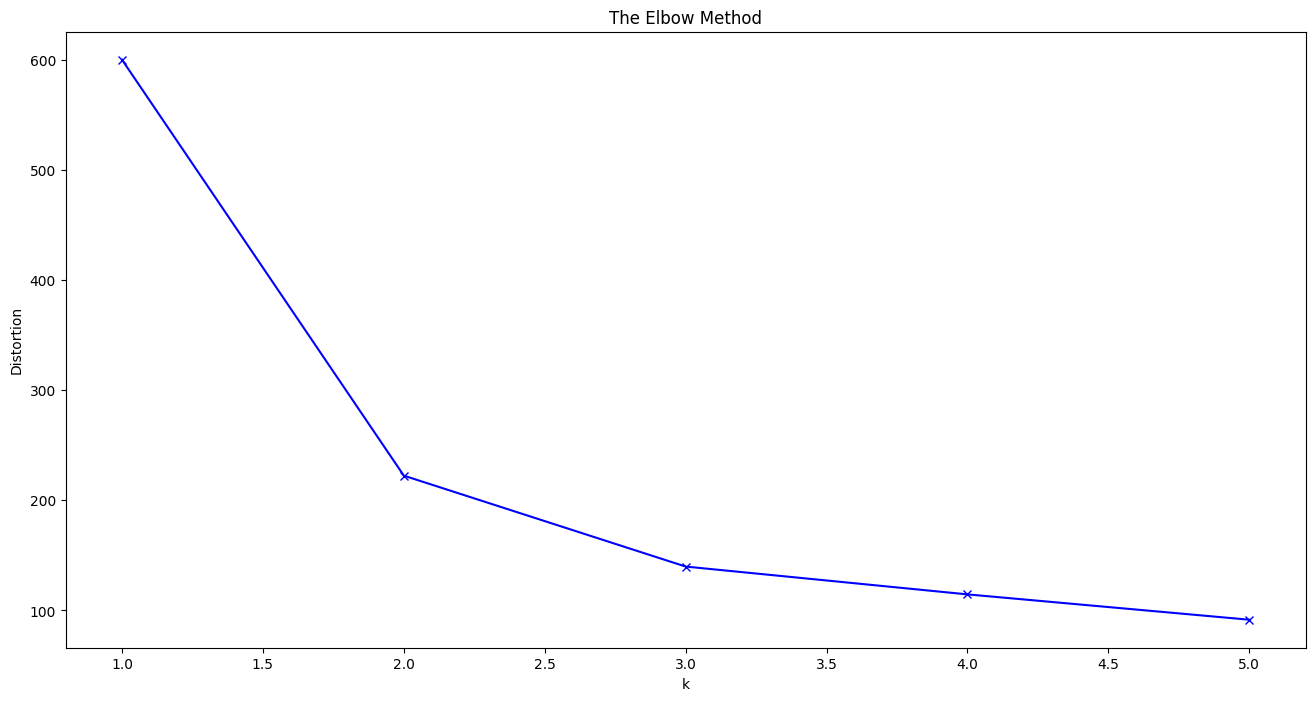

In [7]:
distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(
        init="random", # inicialização aleatória, poderia ser k-means++ para inicialização otimizada
        n_clusters=k, # número de clusters
        n_init=10, # número de inicializações, sklearn retornará o que tiver menor SSE
        max_iter=300, # número máximo de iterações
        random_state=0
        )
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [8]:
kmeans = KMeans(
    init="random", # inicialização aleatória, poderia ser k-means++ para inicialização otimizada
    n_clusters=3, # número de clusters de acordo com método Elbow
    n_init=10, # número de inicializações, sklearn retornará o que tiver menor SSE
    max_iter=300, # número máximo de iterações
    random_state=0 
)

In [9]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3, random_state=0)

# Verificando resultados

In [10]:
# Menor SSE
kmeans.inertia_

139.8204963597498

In [11]:
# Centroides final
kmeans.cluster_centers_

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [12]:
# Iterações até a convergência
kmeans.n_iter_

11

In [13]:
# Atribuição dos clusters
kmeans.labels_[:5]

# Outra forma:
# y_kmeans = kmeans.predict(X)
# y_kmeans[:5]

array([0, 0, 0, 0, 0])

# Visualização dos resultados

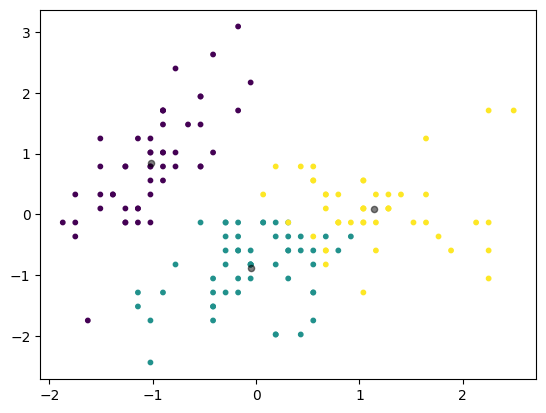

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5);

# Exportando resultados

In [15]:
k_labels=kmeans.labels_
k_labels=pd.DataFrame(k_labels)

In [16]:
k_labels.to_csv(r'clusters.txt', header=None, index=True, sep=' ', mode='a')